# Exercise 05: Ensembles with Fixed Degree Sequence and the Friendship Paradox

**Assignment due:** *March 26 2019*  

In this week's exercise, we implement the configuration model after Molloy and Reed, which can be used to generate random networks with arbitrary degree distributions. Then, we explore the friendship paradox in (social) networks.

In [1]:
#BOILERPLATE_CODE
%matplotlib inline

import pathpy as pp
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt

### Task 1: When is a sequence graphic?

Implement a function that tests whether a given sequence of degrees is graphic, as defined in L03 slide 3. Use the the results presented in Behzad and Chartrand 1967 and Erdös and Gallai 1960 as summarised [here](http://mathworld.wolfram.com/GraphicSequence.html) and [here](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93Gallai_theorem). Test your function with one sequence that is definitely graphic and one that is definitely not graphic.

In [2]:
def is_graphic_Erdos_Gallai(seq):
    seq = np.sort(seq)[::-1]
#     print(seq)
    if np.sum(seq)%2 != 0:
        print('Sum of degrees is odd.')
        return False
    
    for i in range(1, len(seq)):
        lht = np.sum(seq[:i+1])
        rht = i * (i - 1)
        for j in range(i+1, len(seq)):
            rht += min(j, seq[j])
#         print(lht, rht)
        if lht > rht:
            print('Unequality of Erdős–Gallai theorem not fulfilled')
            return False
    
    return True

In [3]:
sequence_lecture = [2, 3, 2, 4, 2, 3, 2] # Example from lecture L03
test_sequence = [2, 3, 2, 4, 2, 3, 2, 10] # add a 8-th node with degree 10

In [4]:
is_graphic_Erdos_Gallai(sequence_lecture) 

True

In [5]:
is_graphic_Erdos_Gallai(test_sequence) # Last entry is larger than n-1

Unequality of Erdős–Gallai theorem not fulfilled


False

Create a function that is the same as `is_graphic_Erdos_Gallai`, but do not sort the sequence at the beginning, i.e. do not impose the condition $d_1 \leq d_2 \leq \ldots$. Now find a sequence for which the two functions give different results.

In [6]:
def is_graphic_Erdos_Gallai_unsorted(seq):
    seq = np.asarray(seq)
#     print(seq)
    if np.sum(seq)%2 != 0:
        print('Sum of degrees is odd.')
        return False
    
    for i in range(1, len(seq)):
        lht = np.sum(seq[:i+1])
        rht = i * (i - 1)
        for j in range(i+1, len(seq)):
            rht += min(j, seq[j])
#         print(lht, rht)
        if lht > rht:
            print('Unequality of Erdős–Gallai theorem not fulfilled')
            return False
    
    return True

In [7]:
is_graphic_Erdos_Gallai_unsorted(test_sequence) # Example from lecture

True

In [8]:
# print(
#     is_graphic_Erdos_Gallai_unsorted(test_sequence) == is_graphic_Erdos_Gallai(test_sequence)
# ) 

### Task 2: The Molloy-Reed Configuration Model

Implement the configuration model for random networks with a given degree sequence in `python` as described in lecture L04.  Please do not use the built-in `pathpy` function, but rather implement the generating process on your own. 

**Hint:** Use the function `is_graphic_sequence` from the module `pathpy.algorithms.random_graphs` if you could not manage to write your own function `is_graphic_Erdos_Gallai`.

In [9]:
def molloy_reed_conf(degrees):
    n = len(degrees)
    g = pp.Network(directed=False)
    for i in range(n):
        g.add_node(i)
        
    if is_graphic_Erdos_Gallai(degrees):        
        stubs = [i for i, iVal in enumerate(degrees) for k in range(iVal)]
        while stubs:
            i = np.random.choice(stubs)
            stubs.remove(i)
            j = np.random.choice(stubs)
            stubs.remove(j)
            g.add_edge(i, j)
    
    else:
        print('Erdős–Gallai theorem ist not fulfilled. Returning empty graph.')
    
    return g

Use your function to generate a k-regular random network with $100$ nodes and $k = 4$, i.e. a network in which all nodes have a degree of exactly four.

In [10]:
degrees_rrg = np.full(shape=100, fill_value=4)
rrg = molloy_reed_conf(degrees_rrg)

Following the approach introduced in lecture 5, draw two degree sequences with 300 entries each from a *Zipf* distribution with parameter $\gamma=2.5$, and a Poisson distribution with $\lambda=3$. Generate two random networks with the drawn degree sequences, plot the networks as well as their degree distributions. Use `np.random.zipf` and `np.random.poisson`.

In [11]:
tester = False 
while not tester:
    degrees_zipf = np.random.zipf(2.5, size=300)
    tester = is_graphic_Erdos_Gallai(degrees_zipf)

tester = False  
while not tester:
    degrees_poisson = np.random.poisson(lam=3., size=300)
    tester = is_graphic_Erdos_Gallai(degrees_poisson)

Sum of degrees is odd.
Sum of degrees is odd.
Sum of degrees is odd.


In [12]:
g_poisson = molloy_reed_conf(degrees_poisson)

In [13]:
g_zipf = molloy_reed_conf(degrees_zipf)

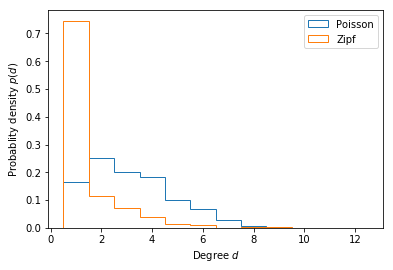

In [14]:
bins = np.arange(max(np.append(degrees_poisson, degrees_zipf))) + .5

fig = plt.figure()
ax = plt.subplot(111)
n_, bins_, patches_ = ax.hist(degrees_poisson, bins=bins, density=True, label='Poisson', histtype='step')
n_, bins_, patches_ = ax.hist(degrees_zipf, bins=bins, density=True, label='Zipf', histtype='step')
ax.set_xlabel(r'Degree $d$')
ax.set_ylabel(r'Probablity density $p\left(d\right)$')
# ax.set_yscale('log')
ax.legend(loc='best')

fig.savefig('./graphics/exercise_05_task_2_distributions.pdf')

Generate random networks with the two degree sequences. Plot the networks as well as their degree distributions.

In [15]:
pp.visualisation.plot(g_zipf)

In [16]:
pp.visualisation.plot(g_poisson)

### Task 3: The Friendship Paradox

Load the network `lotr` from the file `01_networks.db`, which captures co-occurrence of character names in sentences. Each co-occurrence will be treated as friendship.

In [17]:
#BOILERPLATE_CODE
import matplotlib.mlab as mlab
import sqlite3

con = sqlite3.connect('./01_networks.db')
con.row_factory = sqlite3.Row

g_lotr = pp.Network.from_sqlite(con.execute('SELECT source, target FROM lotr'), directed=False)

2021-12-24 16:30:53 [Severity.INFO]	Retrieving links from database ...


How many friends does `Tom` have? How many friends do his friends have on average? Who are `Tom`'s friends?

In [18]:
def node_degree(g, name):
    return g.nodes[name]['degree']
    
def avg_neighbor_degree(g, name):
    friend_count = 0.
    for i in g.successors[name]:
        friend_count += g.nodes[i]['degree']
    
    return friend_count / g.nodes[name]['degree']

name = 'Tom'

print(
    'Tom has {0:d} friends. His friends have on average {1:.2f} friends.'
      .format(node_degree(g_lotr, name), avg_neighbor_degree(g_lotr, name))
)

Tom has 9 friends. His friends have on average 27.33 friends.


This is the, so-called, **friendship paradox**. It states that your friends have on average more friends than you. It is called "paradox" because intuitively you and your friends appear to be the same. So the average should give the same number. 

In the following, we test this paradox in the network of character co-ocurrences in the Lord of the Rings. Calculate how many friends the characters have *on average*.

In [19]:
print('The characters have on average {0:.3f} friends.'
      .format(np.average([node_degree(g_lotr, name) for name in g_lotr.nodes]))
     )

The characters have on average 9.122 friends.


The correct value is 9.122. 

Now for every node $v$ in the network calculate the mean degree $k_n$ of their neighbours. Now compare the average $\langle k_n \rangle$ across all nodes $v$ to the mean degree $\langle k \rangle$ calculated above.

In [20]:
print('The neighbors of each character have on average {0:.3f} friends.'
      .format(np.average([avg_neighbor_degree(g_lotr, name) for name in g_lotr.nodes]))
     )

The neighbors of each character have on average 20.014 friends.


The correct value for $\langle k_n \rangle$ should be approximately 20, so the friendship paradox holds *on average*. However, there may be individual nodes in the network for whom the paradox does *not* hold. In the following we study for which nodes the number of friends ($k$) is smaller than the average number ($k_n$) of direct friends that their friends have?

To answer this question, we use the following helper function. It produces the following plot: it shows the degrees of all nodes on the x-axis, with the corresponding mean neighbour degrees on the y-axis. We further count for how many nodes in this network the friendship paradox holds, i.e. for how many nodes we have $k_n>k$.

Number of nodes for which k_n > k = 125
Number of nodes for which k_n < k = 14


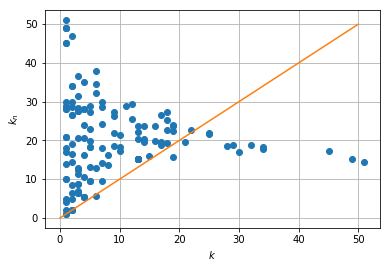

In [21]:
#BOILERPLATE_CODE

def plotNeighbourDegrees(g):
    degrees = [node_degree(g, name) for name in g.nodes]
    ndegrees = [avg_neighbor_degree(g, name) for name in g.nodes]
    
    cnt_larger = 0
    cnt_smaller = 0
    for degree, ndegree in zip(degrees, ndegrees):
        if degree > ndegree:
            cnt_smaller += 1
        else:
            cnt_larger += 1
#     for v in g.nodes:
#         knn = 0
#         ...
            
    print("Number of nodes for which k_n > k =", cnt_larger)
    print("Number of nodes for which k_n < k =", cnt_smaller)
    
    plt.clf()
    plt.grid(True)
    plt.xlabel(r'$k$')
    plt.ylabel(r'$k_n$')
    plt.plot(degrees, ndegrees, 'o')
    plt.plot(range(max(g.degrees())), range(max(g.degrees())), '-')
    plt.savefig('./graphics/exercise_05_task_3_friends_paradox.pdf')
    plt.show()

plotNeighbourDegrees(g_lotr)

Print the names of those characters that have more friends than their friends have on average.

In [22]:
def surpasses_the_friends_friend_count(g):
    return [name for name in g.nodes if node_degree(g, name) > avg_neighbor_degree(g, name)]

surpasses_the_friends_friend_count(g_lotr)

['Gandalf',
 'Elrond',
 'Frodo',
 'Bilbo',
 'Aragorn',
 'Faramir',
 'Merry',
 'Pippin',
 'Sam',
 'Gimli',
 'Legolas',
 'Helm',
 'Grimbold',
 'Théoden']